In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive"

Mounted at /content/drive
MyDrive


In [2]:
ls /content/drive/MyDrive/datasets/kaggle/

churn_prediction.csv  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data_2 = data[(data.gender == 'Male') & (data.tenure>=34) & (data.tenure<=60)]
data_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
24,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7024,7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No


In [ ]:
del data_2

In [5]:
cat = []
num = []
for i in data.columns:
  print("%s -----> %s" % (i,data[i].dtypes))
  if (data[i].dtypes == 'object'):
        cat.append(i)
  else:
      num.append(i)

customerID -----> object
gender -----> object
SeniorCitizen -----> int64
Partner -----> object
Dependents -----> object
tenure -----> int64
PhoneService -----> object
MultipleLines -----> object
InternetService -----> object
OnlineSecurity -----> object
OnlineBackup -----> object
DeviceProtection -----> object
TechSupport -----> object
StreamingTV -----> object
StreamingMovies -----> object
Contract -----> object
PaperlessBilling -----> object
PaymentMethod -----> object
MonthlyCharges -----> float64
TotalCharges -----> object
Churn -----> object


In [6]:
for i in range(0,len(cat)):
  print(data[cat[i]].value_counts()) # value counts for non-numeric variable
  print("________________________________________________________")

9497-QCMMS    1
2478-EEWWM    1
8168-UQWWF    1
0550-DCXLH    1
3096-IZETN    1
             ..
5797-APWZC    1
0468-YRPXN    1
7181-OQCUT    1
5622-UEJFI    1
1492-QGCLU    1
Name: customerID, Length: 7043, dtype: int64
________________________________________________________
Male      3555
Female    3488
Name: gender, dtype: int64
________________________________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
________________________________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
________________________________________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
________________________________________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
________________________________________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
___________

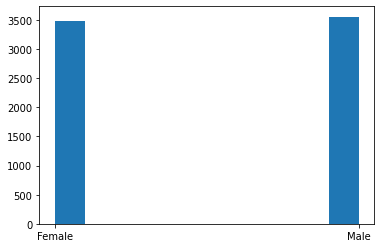

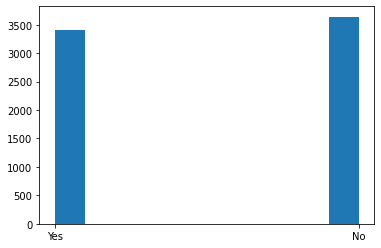

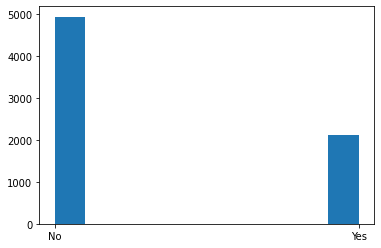

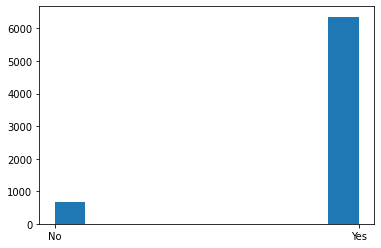

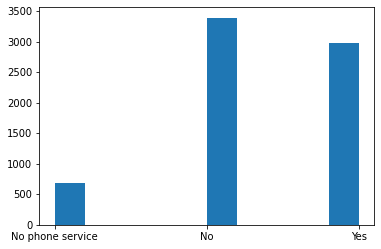

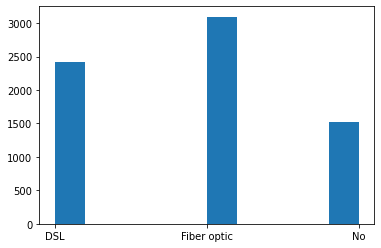

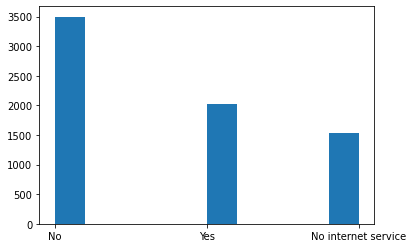

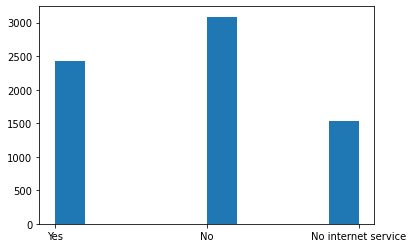

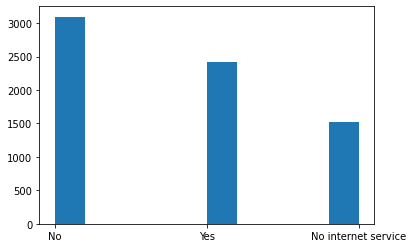

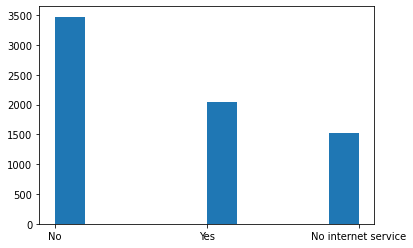

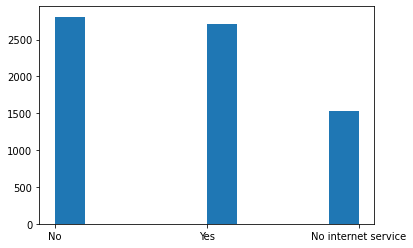

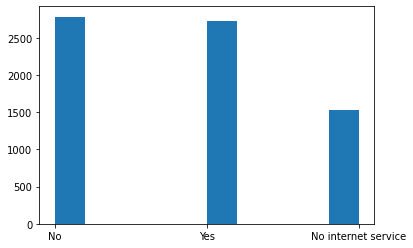

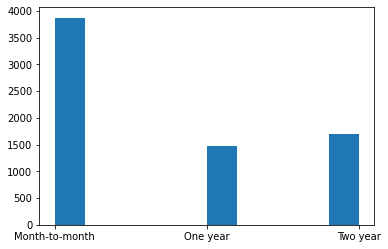

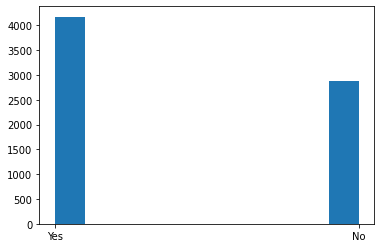

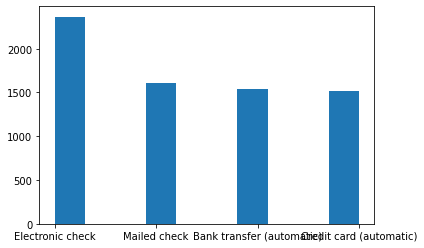

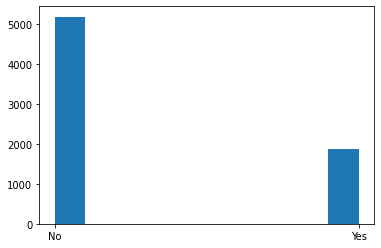

In [7]:
#histogram distribution of categorical variables

for i in range(1,len(cat)):
  if (cat[i] != 'TotalCharges'):
    plt.figure()
    plt.hist(data[cat[i]]) # value counts for non-numeric variable
plt.show()

In [8]:
#data transformation

#label encoded labelling for dichotomous variables 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

cat_dichotomous = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for i in range(0,len(cat_dichotomous)):
    data[cat_dichotomous[i]] = labelencoder.fit_transform(data[cat_dichotomous[i]])

data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [9]:
# data transformation

# one-hot labelling for non-ordinal categorical variables

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

cat_non_ordinal = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV'
                    ,'StreamingMovies','Contract','PaymentMethod']

MultipleLines_df = pd.DataFrame(data['MultipleLines'])
dum_df = pd.get_dummies(MultipleLines_df,prefix='MultipleLines_is')

MultipleLines_df = MultipleLines_df.join(dum_df)
MultipleLines_df

for i in range(0,len(cat_non_ordinal)):
  dum_df = pd.get_dummies(data[cat_non_ordinal[i]],prefix=cat_non_ordinal[i]+'_is')
  data = data.join(dum_df)


data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [10]:
# drop all original categorical features ,remove the CUST ID 

to_drop = ['customerID','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV'
                    ,'StreamingMovies','Contract','PaymentMethod']

data = data.drop(to_drop,axis=1)

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [11]:
#describe the numeric/continuos fields

data['tenure'].describe()



count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [12]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [13]:
pd.to_numeric(data['TotalCharges'],errors='coerce').describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

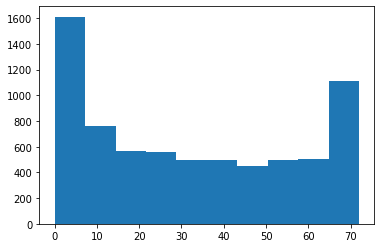

In [14]:
plt.hist(data['tenure'])

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

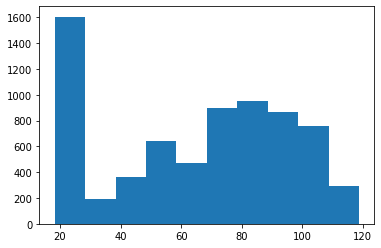

In [15]:
plt.hist(data['MonthlyCharges'])

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

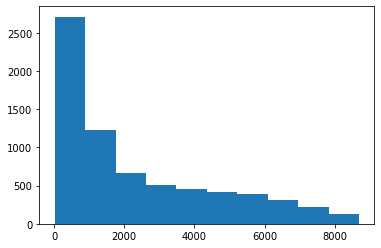

In [16]:
plt.hist(pd.to_numeric(data['TotalCharges'],errors='coerce'))

In [17]:
#convert the Total charges field to numeric,coerce exceptions to 'NaN'. 'NaN' are to be dropped later

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [18]:
#cal not churn
data['Not_Churn'] = 1-data['Churn']
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,Not_Churn
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [19]:
#odds ratio calculation for continuos variables

#create Churn and Not Churn columns

def create_bins(data,var,bin):
    label = []
    for i in range(1,len(bin)):
      label.extend([var+'_under_'+str(bin[i])])

    data[var+'_binned'] = pd.cut(data[var],bins=bin,labels=label)
    return data


def odds_ratio_calc(data,binned_var):
  import math
  total_records = len(data)
  odds = data[['Churn','Not_Churn',binned_var]]
  odds = odds.groupby(binned_var).agg('sum')
  odds['total_records'] = odds['Churn']+odds['Not_Churn']
  odds['total_records_per_bin'] = (odds['total_records']/total_records)*100
  odds['Not_Churn_%'] = (odds['Not_Churn']/(odds['Not_Churn']+odds['Churn']))*100
  odds['Churn_%'] = (odds['Churn']/(odds['Not_Churn']+odds['Churn']))*100
  odds['odds_ratio'] = (odds['Churn']+1)/(odds['Not_Churn']+1)
  #odds['woe'] = odds['odds_ratio'].apply(lambda x: math.log(1/(x+1))) # added one to handle case of zero event rate
  odds['woe'] = np.log(odds['odds_ratio']) #odds['event_0']/odds['event_1']
  odds['info_value'] = (odds['Churn_%']-odds['Not_Churn_%'])*odds['woe']
  return odds





In [20]:
#data = create_bins(data,'tenure',[0,7.2, 14.4,64.8,72])
data = create_bins(data,'tenure',[0,5,20,40,60,80])
odds = odds_ratio_calc(data,'tenure_binned')
odds

,Churn,Not_Churn,total_records,total_records_per_bin,Not_Churn_%,Churn_%,odds_ratio,woe,info_value
tenure_binned,,,,,,,,,
tenure_under_5,744,616,1360,19.309953,45.294118,54.705882,1.207455,0.188515,1.774261
tenure_under_20,507,1000,1507,21.397132,66.357001,33.642999,0.507493,-0.678273,22.189035
tenure_under_40,315,1093,1408,19.991481,77.627841,22.372159,0.288848,-1.241854,68.619477
tenure_under_60,210,1140,1350,19.167968,84.444444,15.555556,0.184926,-1.687802,116.270819
tenure_under_80,93,1314,1407,19.977282,93.390192,6.609808,0.071483,-2.638297,228.952440


In [21]:
data = create_bins(data,'MonthlyCharges',[0,25,60,80,120])
odds_1 = odds_ratio_calc(data,'MonthlyCharges_binned')
odds_1

,Churn,Not_Churn,total_records,total_records_per_bin,Not_Churn_%,Churn_%,odds_ratio,woe,info_value
MonthlyCharges_binned,,,,,,,,,
MonthlyCharges_under_25,127,1279,1406,19.963084,90.967283,9.032717,0.100000,-2.302585,188.661311
MonthlyCharges_under_60,363,1149,1512,21.468124,75.992063,24.007937,0.316522,-1.150363,59.800635
MonthlyCharges_under_80,473,986,1459,20.715604,67.580535,32.419465,0.480243,-0.733463,25.789333
MonthlyCharges_under_120,906,1760,2666,37.853188,66.016504,33.983496,0.515048,-0.663495,21.253730


In [22]:
data = create_bins(data,'TotalCharges',[0,500,1000,2000,4000,10000])
odds_2 = odds_ratio_calc(data,'TotalCharges_binned')
odds_2

,Churn,Not_Churn,total_records,total_records_per_bin,Not_Churn_%,Churn_%,odds_ratio,woe,info_value
TotalCharges_binned,,,,,,,,,
TotalCharges_under_500,829,1171,2000,28.396990,58.550000,41.450000,0.708191,-0.345041,5.900206
TotalCharges_under_1000,241,652,893,12.679256,73.012318,26.987682,0.370597,-0.992639,45.685867
TotalCharges_under_2000,269,1014,1283,18.216669,79.033515,20.966485,0.266010,-1.324222,76.893635
TotalCharges_under_4000,287,921,1208,17.151782,76.241722,23.758278,0.312364,-1.163585,61.068934
TotalCharges_under_10000,243,1405,1648,23.399120,85.254854,14.745146,0.173542,-1.751336,123.486180


In [23]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,Not_Churn,tenure_binned,MonthlyCharges_binned,TotalCharges_binned
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,tenure_under_5,MonthlyCharges_under_60,TotalCharges_under_500
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,tenure_under_40,MonthlyCharges_under_60,TotalCharges_under_2000
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,tenure_under_5,MonthlyCharges_under_60,TotalCharges_under_500
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,tenure_under_60,MonthlyCharges_under_60,TotalCharges_under_2000
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,tenure_under_5,MonthlyCharges_under_80,TotalCharges_under_500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,tenure_under_40,MonthlyCharges_under_120,TotalCharges_under_2000
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,tenure_under_80,MonthlyCharges_under_120,TotalCharges_under_10000
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,tenure_under_20,MonthlyCharges_under_60,TotalCharges_under_500
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,tenure_under_5,MonthlyCharges_under_80,TotalCharges_under_500


In [24]:
#add the binned variables into the dataset by creating dummies
binned_variables = ['tenure_binned','MonthlyCharges_binned','TotalCharges_binned']

for i in range(0,len(binned_variables)):
  dum_df = pd.get_dummies(data[binned_variables[i]])
  data = data.join(dum_df)

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,Not_Churn,tenure_binned,MonthlyCharges_binned,TotalCharges_binned,tenure_under_5,tenure_under_20,tenure_under_40,tenure_under_60,tenure_under_80,MonthlyCharges_under_25,MonthlyCharges_under_60,MonthlyCharges_under_80,MonthlyCharges_under_120,TotalCharges_under_500,TotalCharges_under_1000,TotalCharges_under_2000,TotalCharges_under_4000,TotalCharges_under_10000
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,tenure_under_5,MonthlyCharges_under_60,TotalCharges_under_500,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,tenure_under_40,MonthlyCharges_under_60,TotalCharges_under_2000,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,tenure_under_5,MonthlyCharges_under_60,TotalCharges_under_500,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,tenure_under_60,MonthlyCharges_under_60,TotalCharges_under_2000,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,tenure_under_5,MonthlyCharges_under_80,TotalCharges_under_500,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,tenure_under_40,MonthlyCharges_under_120,TotalCharges_under_2000,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,tenure_under_80,MonthlyCharges_under_120,TotalCharges_under_10000,0,0,0,0,1,0,0,0,1,0,0,0,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,tenure_under_20,MonthlyCharges_under_60,TotalCharges_under_500,0,1,0,0,0,0,1,0,0,1,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,tenure_under_5,MonthlyCharges_under_80,TotalCharges_under_500,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [25]:
to_drop = ['tenure','MonthlyCharges','TotalCharges','tenure_binned','MonthlyCharges_binned','TotalCharges_binned']
data = data.drop(to_drop,axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,Not_Churn,tenure_under_5,tenure_under_20,tenure_under_40,tenure_under_60,tenure_under_80,MonthlyCharges_under_25,MonthlyCharges_under_60,MonthlyCharges_under_80,MonthlyCharges_under_120,TotalCharges_under_500,TotalCharges_under_1000,TotalCharges_under_2000,TotalCharges_under_4000,TotalCharges_under_10000
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [26]:
data =  data.drop('Not_Churn',axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,tenure_under_5,tenure_under_20,tenure_under_40,tenure_under_60,tenure_under_80,MonthlyCharges_under_25,MonthlyCharges_under_60,MonthlyCharges_under_80,MonthlyCharges_under_120,TotalCharges_under_500,TotalCharges_under_1000,TotalCharges_under_2000,TotalCharges_under_4000,TotalCharges_under_10000
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [27]:
#test train split
from sklearn.model_selection import train_test_split

y = data['Churn']
X = data.drop('Churn',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

y_train.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [28]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_is_No,MultipleLines_is_No phone service,MultipleLines_is_Yes,InternetService_is_DSL,InternetService_is_Fiber optic,InternetService_is_No,OnlineSecurity_is_No,OnlineSecurity_is_No internet service,OnlineSecurity_is_Yes,OnlineBackup_is_No,OnlineBackup_is_No internet service,OnlineBackup_is_Yes,DeviceProtection_is_No,DeviceProtection_is_No internet service,DeviceProtection_is_Yes,TechSupport_is_No,TechSupport_is_No internet service,TechSupport_is_Yes,StreamingTV_is_No,StreamingTV_is_No internet service,StreamingTV_is_Yes,StreamingMovies_is_No,StreamingMovies_is_No internet service,StreamingMovies_is_Yes,Contract_is_Month-to-month,Contract_is_One year,Contract_is_Two year,PaymentMethod_is_Bank transfer (automatic),PaymentMethod_is_Credit card (automatic),PaymentMethod_is_Electronic check,PaymentMethod_is_Mailed check,tenure_under_5,tenure_under_20,tenure_under_40,tenure_under_60,tenure_under_80,MonthlyCharges_under_25,MonthlyCharges_under_60,MonthlyCharges_under_80,MonthlyCharges_under_120,TotalCharges_under_500,TotalCharges_under_1000,TotalCharges_under_2000,TotalCharges_under_4000,TotalCharges_under_10000
gender,1.000000,-0.005691,-0.010143,0.011058,-0.009706,-0.014090,-0.002459,0.009706,-0.003307,0.011697,-0.014528,0.003996,0.015696,0.003996,-0.021021,0.021237,0.003996,-0.025536,0.006571,0.003996,-0.010371,0.007486,0.003996,-0.011906,0.010443,0.003996,-0.013873,0.008653,0.003996,-0.012052,-0.003756,0.008001,-0.003300,-0.010844,-0.000447,0.006270,0.004089,0.004194,-0.013404,0.012499,-0.005263,0.001574,0.003528,0.013247,-0.004299,-0.010569,-0.001557,-0.019519,0.009912,0.011260,-0.002731
SeniorCitizen,-0.005691,1.000000,0.016648,-0.211271,0.000581,0.156417,-0.122487,-0.000581,0.123974,-0.102161,0.255584,-0.189718,0.189689,-0.189718,-0.036739,0.089756,-0.189718,0.070836,0.092845,-0.189718,0.067831,0.208213,-0.189718,-0.057097,0.057814,-0.189718,0.102617,0.041036,-0.189718,0.119373,0.146099,-0.046580,-0.125754,-0.017443,-0.024547,0.167972,-0.147658,-0.012003,-0.001855,0.014318,0.012922,-0.011769,-0.179389,-0.066227,0.035180,0.174235,-0.069495,-0.032506,-0.032017,0.070972,0.066759
Partner,-0.010143,0.016648,1.000000,0.447629,0.031578,-0.020634,-0.134267,-0.031578,0.154350,-0.010545,0.009474,0.000755,-0.137705,0.000755,0.151724,-0.148644,0.000755,0.153876,-0.149624,0.000755,0.156254,-0.114363,0.000755,0.125586,-0.124337,0.000755,0.124236,-0.111058,0.000755,0.110650,-0.288915,0.086468,0.254102,0.099684,0.105695,-0.082986,-0.108460,-0.277740,-0.119882,-0.000174,0.113375,0.281086,-0.026341,-0.079312,-0.048500,0.128899,-0.284628,-0.044798,0.035260,0.046810,0.260505
Dependents,0.011058,-0.211271,0.447629,1.000000,-0.005830,-0.109935,0.017975,0.005830,-0.021619,0.055806,-0.169426,0.139496,-0.192638,0.139496,0.085854,-0.143027,0.139496,0.027996,-0.125825,0.139496,0.010485,-0.175624,0.139496,0.066857,-0.100627,0.139496,-0.017083,-0.080528,0.139496,-0.037314,-0.228762,0.062427,0.206994,0.038355,0.082329,-0.152754,0.053380,-0.136810,-0.045053,0.015954,0.040313,0.119058,0.115294,0.018547,-0.051092,-0.068094,-0.090162,0.006208,0.051349,-0.013318,0.050571
PhoneService,-0.009706,0.000581,0.031578,-0.005830,1.000000,0.014489,0.310980,-1.000000,0.282513,-0.450204,0.288234,0.172087,-0.064212,0.172087,-0.086044,-0.087160,0.172087,-0.058281,-0.071817,0.172087,-0.074532,-0.065698,0.172087,-0.084202,-0.122528,0.172087,-0.022690,-0.116426,0.172087,-0.028911,-0.000278,-0.010171,0.010091,0.006453,-0.022687,0.008085,0.006735,-0.005633,0.012544,-0.012407,-0.019507,0.024701,0.122250,-0.530740,0.111686,0.257185,-0.034376,-0.005487,-0.019132,-0.086883,0.135249
PaperlessBilling,-0.014090,0.156417,-0.020634,-0.109935,0.014489,1.000000,-0.159563,-0.014489,0.169690,-0.064025,0.333920,-0.327897,0.261074,-0.327897,0.010410,0.153873,-0.327897,0.123735,0.164513,-0.327897,0.112994,0.232661,-0.327897,0.041767,0.046887,-0.327897,0.230622,0.070271,-0.327897,0.206972,0.176113,-0.051368,-0.156

In [ ]:
X_train.corr().to_csv('/content/drive/MyDrive/datasets/kaggle/churn_prediction.csv')

In [30]:
#handle imbalanced dataset and select data from train sets
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
# drop the cust-id field thats the unit of modelling, separate data into X and Y


X_res,y_res = rus.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
from collections import Counter
Counter(y_res)

Counter({0: 1390, 1: 1390})

In [32]:
type(X_res)

numpy.ndarray

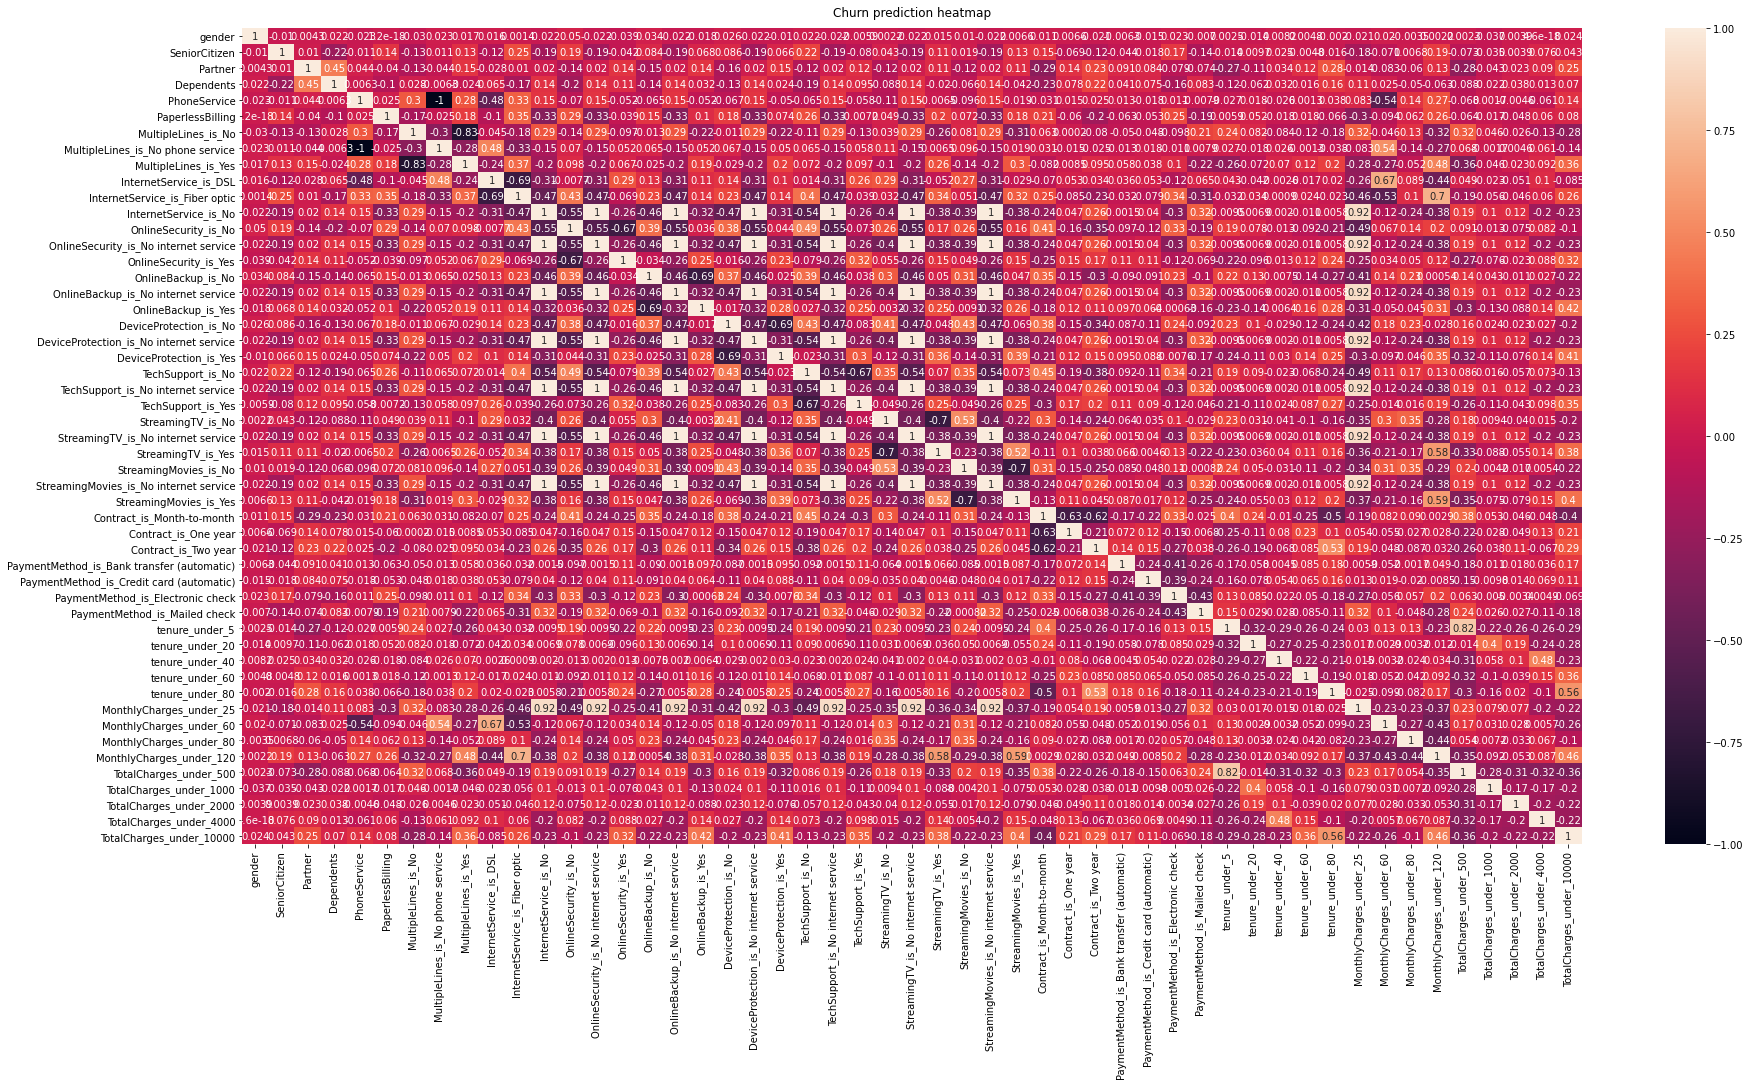

In [35]:
#check heatmap of sample

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
X_res_df = pd.DataFrame(np.array(X_res),columns=X_train.columns)
heatmap = sns.heatmap(X_res_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Churn prediction heatmap', fontdict={'fontsize':12}, pad=12);



In [53]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

best = SelectKBest(chi2,k='all')
best.fit(X_res_df,y_res)

SelectKBest(k='all', score_func=<function chi2 at 0x7f61fbe700e0>)

In [55]:
c = X_res_df.columns

print("Column_name  pvalue")
print("____________________")
for i in range(0,len(c)):
  print(c[i],round(best.pvalues_[i],4))

Column_name  pvalue
____________________
gender 0.7885
SeniorCitizen 0.0
Partner 0.0
Dependents 0.0
PhoneService 0.8891
PaperlessBilling 0.0
MultipleLines_is_No 0.1511
MultipleLines_is_No phone service 0.6648
MultipleLines_is_Yes 0.0895
InternetService_is_DSL 0.0
InternetService_is_Fiber optic 0.0
InternetService_is_No 0.0
OnlineSecurity_is_No 0.0
OnlineSecurity_is_No internet service 0.0
OnlineSecurity_is_Yes 0.0
OnlineBackup_is_No 0.0
OnlineBackup_is_No internet service 0.0
OnlineBackup_is_Yes 0.0001
DeviceProtection_is_No 0.0
DeviceProtection_is_No internet service 0.0
DeviceProtection_is_Yes 0.0165
TechSupport_is_No 0.0
TechSupport_is_No internet service 0.0
TechSupport_is_Yes 0.0
StreamingTV_is_No 0.0
StreamingTV_is_No internet service 0.0
StreamingTV_is_Yes 0.0099
StreamingMovies_is_No 0.0
StreamingMovies_is_No internet service 0.0
StreamingMovies_is_Yes 0.0056
Contract_is_Month-to-month 0.0
Contract_is_One year 0.0
Contract_is_Two year 0.0
PaymentMethod_is_Bank transfer (automat

In [58]:
# only show columns with p-value< 0.01 i.e 99% signifiance level

print("Significant_columns  pvalue")
print("____________________")
to_remove = []
for i in range(0,len(c)):
  p = round(best.pvalues_[i],4)
  if (p < 0.01):
    print(c[i],p)
  else:
    to_remove.append(c[i])


Significant_columns  pvalue
____________________
SeniorCitizen 0.0
Partner 0.0
Dependents 0.0
PaperlessBilling 0.0
InternetService_is_DSL 0.0
InternetService_is_Fiber optic 0.0
InternetService_is_No 0.0
OnlineSecurity_is_No 0.0
OnlineSecurity_is_No internet service 0.0
OnlineSecurity_is_Yes 0.0
OnlineBackup_is_No 0.0
OnlineBackup_is_No internet service 0.0
OnlineBackup_is_Yes 0.0001
DeviceProtection_is_No 0.0
DeviceProtection_is_No internet service 0.0
TechSupport_is_No 0.0
TechSupport_is_No internet service 0.0
TechSupport_is_Yes 0.0
StreamingTV_is_No 0.0
StreamingTV_is_No internet service 0.0
StreamingTV_is_Yes 0.0099
StreamingMovies_is_No 0.0
StreamingMovies_is_No internet service 0.0
StreamingMovies_is_Yes 0.0056
Contract_is_Month-to-month 0.0
Contract_is_One year 0.0
Contract_is_Two year 0.0
PaymentMethod_is_Bank transfer (automatic) 0.0
PaymentMethod_is_Credit card (automatic) 0.0
PaymentMethod_is_Electronic check 0.0
PaymentMethod_is_Mailed check 0.0
tenure_under_5 0.0
tenure_un

In [60]:
# features to remove based on p-values of univariate test
to_remove

['gender',
 'PhoneService',
 'MultipleLines_is_No',
 'MultipleLines_is_No phone service',
 'MultipleLines_is_Yes',
 'DeviceProtection_is_Yes',
 'MonthlyCharges_under_60',
 'TotalCharges_under_1000',
 'TotalCharges_under_4000']

In [61]:
#best scores as per univariate tests
print("columns  scores")
print("____________________")
k = {}
for i in range(0,len(c)):
  t = round(best.scores_[i],4)
  k[c[i]] = t

sorted(k.items(),key=lambda x:x[1],reverse=True)


columns  scores
____________________


[('Contract_is_Two year', 351.1899),
 ('Contract_is_Month-to-month', 217.2658),
 ('tenure_under_5', 211.8373),
 ('InternetService_is_No', 202.9141),
 ('OnlineSecurity_is_No internet service', 202.9141),
 ('OnlineBackup_is_No internet service', 202.9141),
 ('DeviceProtection_is_No internet service', 202.9141),
 ('TechSupport_is_No internet service', 202.9141),
 ('StreamingTV_is_No internet service', 202.9141),
 ('StreamingMovies_is_No internet service', 202.9141),
 ('tenure_under_80', 192.087),
 ('OnlineSecurity_is_No', 182.3358),
 ('PaymentMethod_is_Electronic check', 178.2502),
 ('TechSupport_is_No', 174.472),
 ('InternetService_is_Fiber optic', 164.2749),
 ('MonthlyCharges_under_25', 156.821),
 ('OnlineBackup_is_No', 135.5669),
 ('DeviceProtection_is_No', 105.372),
 ('Contract_is_One year', 100.7031),
 ('TotalCharges_under_500', 91.8171),
 ('Dependents', 81.2228),
 ('OnlineSecurity_is_Yes', 79.9094),
 ('SeniorCitizen', 70.7347),
 ('TechSupport_is_Yes', 67.8781),
 ('TotalCharges_under

In [64]:
#remove features as per above univariate test

X_res_df = X_res_df.drop(to_remove,axis=1)

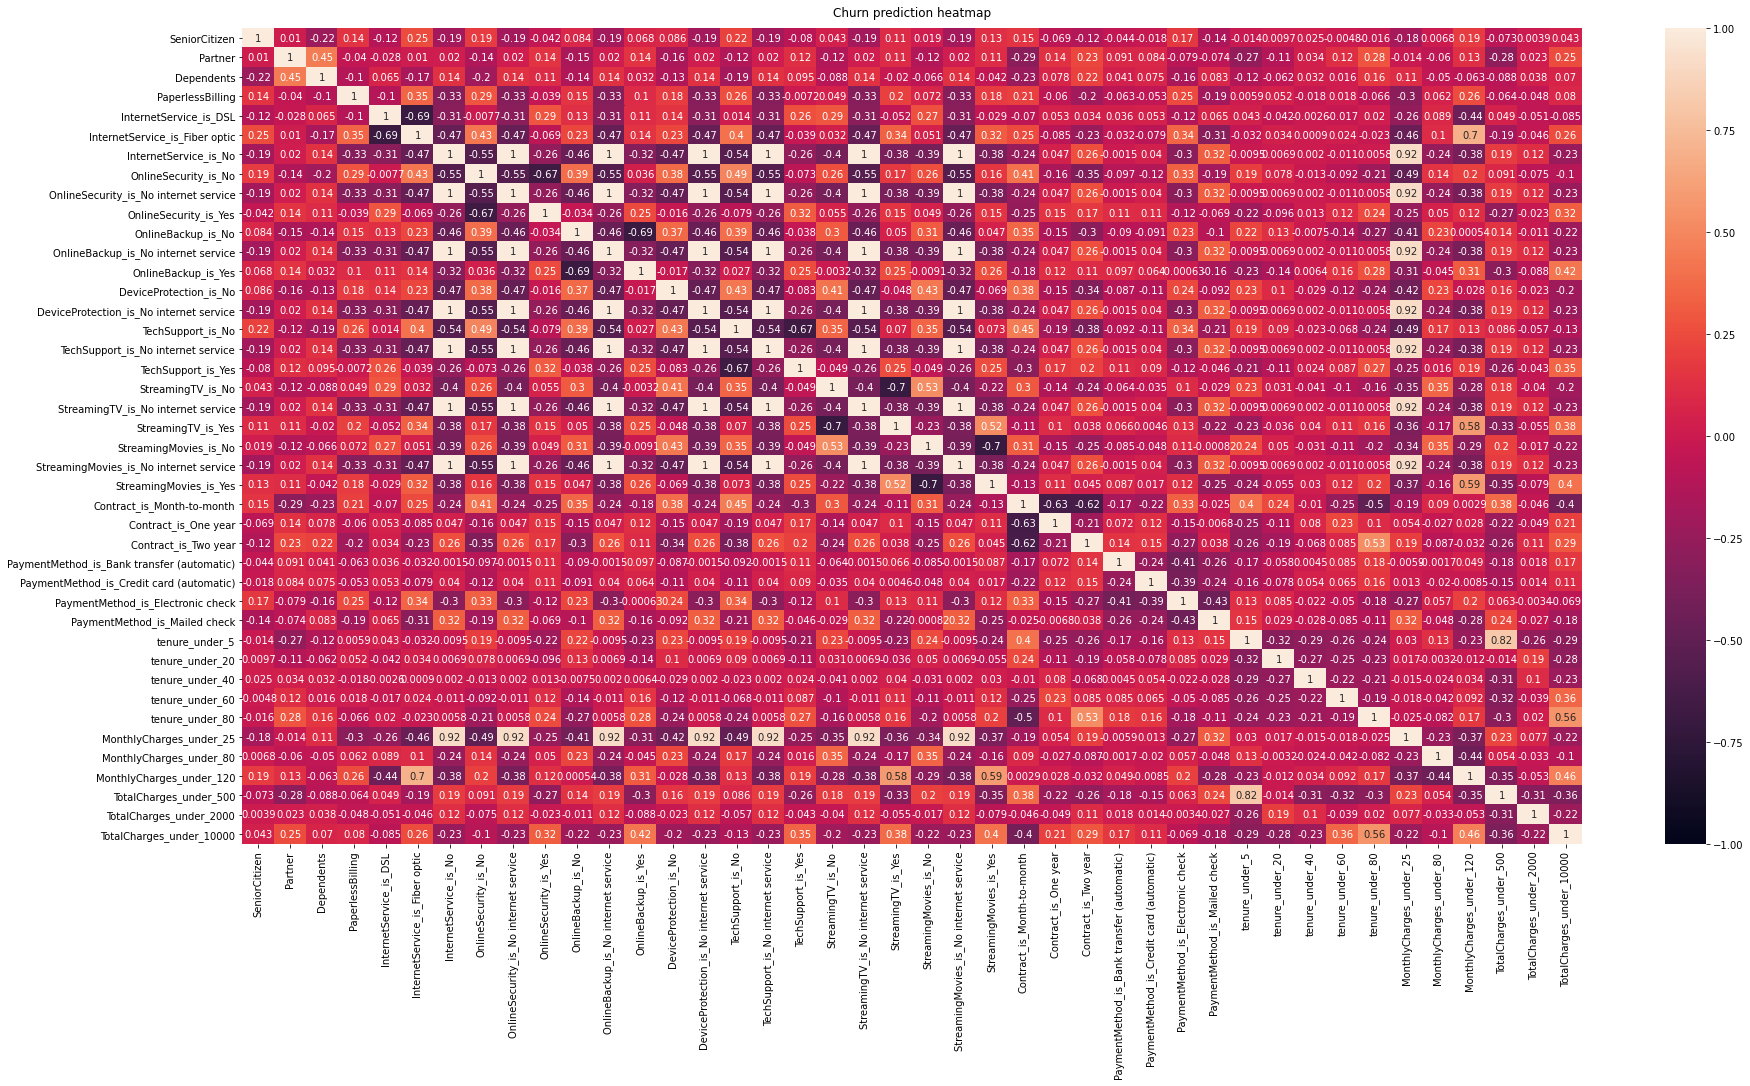

In [65]:
#observe heatmaps again for removing multicollinearity

plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(X_res_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Churn prediction heatmap', fontdict={'fontsize':12}, pad=12);

In [66]:
#removing features based on above heatmap
# For e.g we can see InternetService is NO then StreamingMovies is No Internet service and Streaming TV is no internet service is highly correlated
# We will keep one and remove the other. Threshold for removing correlated features is >0.98


highly_correlated = ['StreamingTV_is_No internet service','StreamingMovies_is_No internet service','TechSupport_is_No internet service',
                     'DeviceProtection_is_No internet service','OnlineBackup_is_No internet service','OnlineSecurity_is_No internet service']

X_res_df = X_res_df.drop(highly_correlated,axis=1)

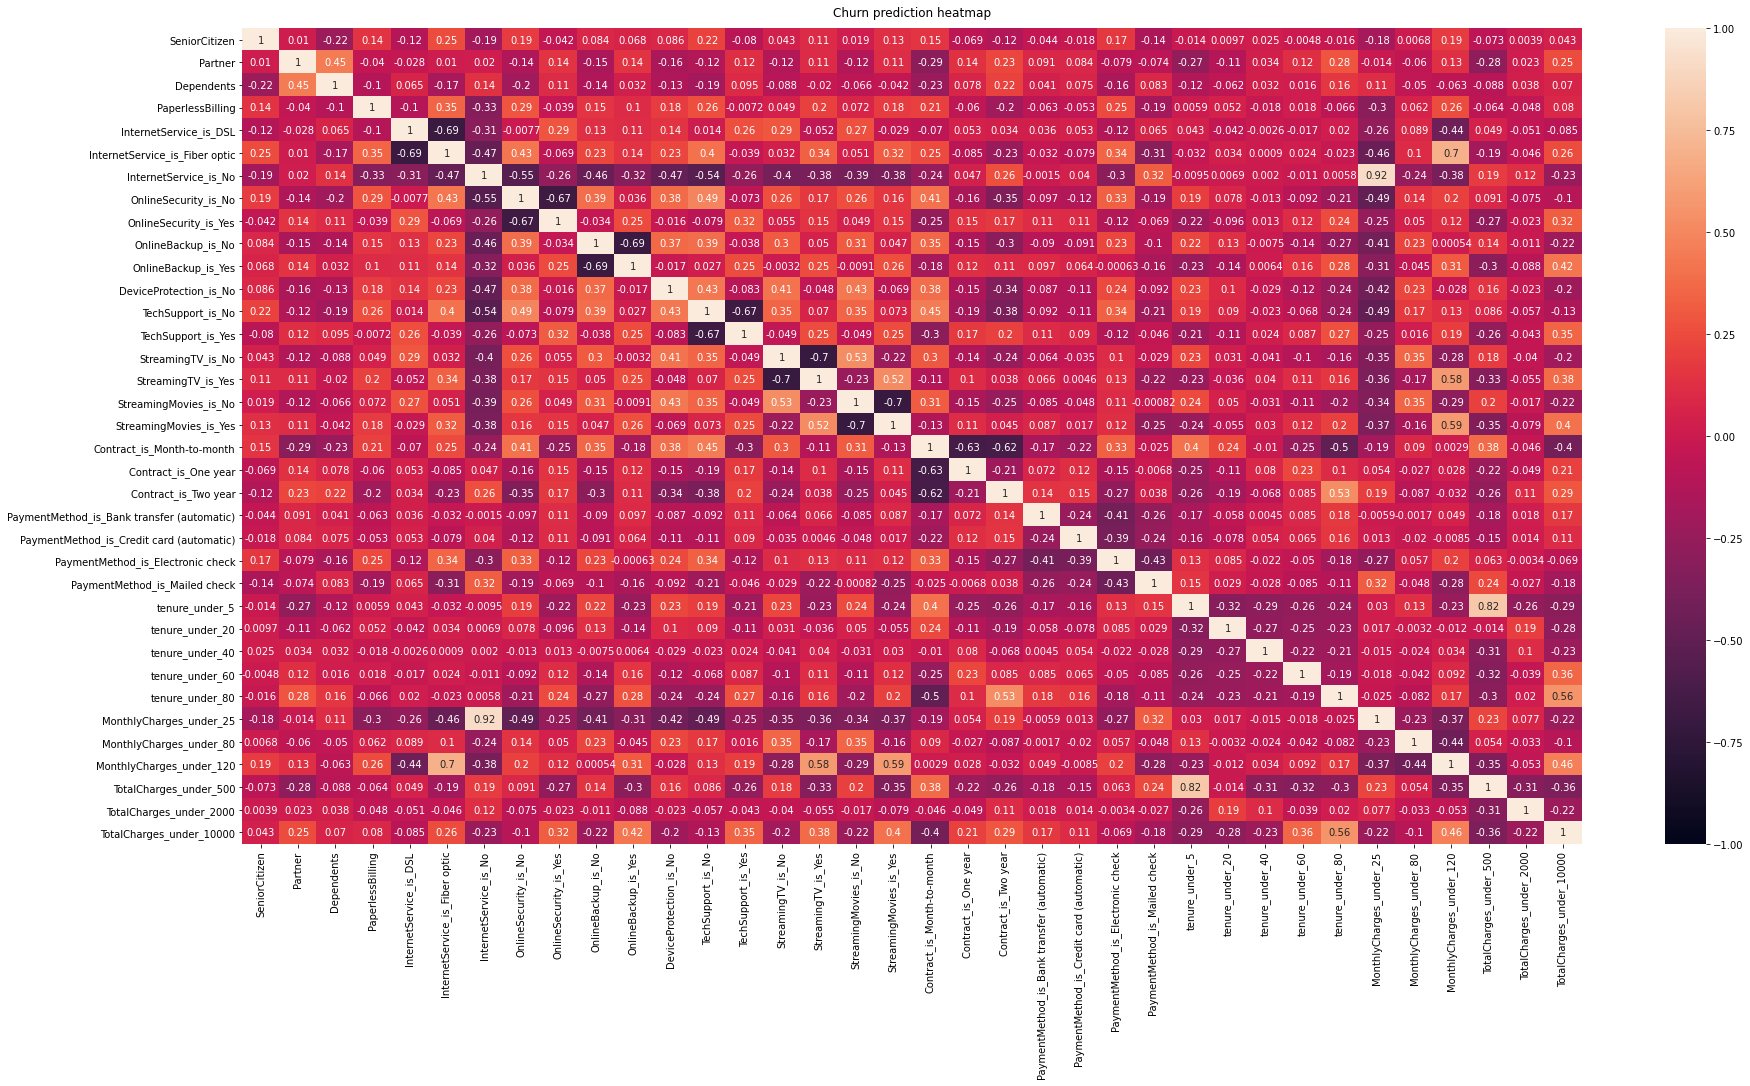

In [67]:
# observing presence of multicollinearity after removal of highly correlated features
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(X_res_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Churn prediction heatmap', fontdict={'fontsize':12}, pad=12);

In [68]:
print("Total number of features removed in process of feature selection",len(X_train.columns)-len(X_res_df.columns))

Total number of features removed in process of feature selection 15


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_res_df,y_res)

model.score(X_res_df,y_res)

0.7712230215827338

In [73]:
# collate all features to be removed from test set
to_remove.extend(highly_correlated)
to_remove

['gender',
 'PhoneService',
 'MultipleLines_is_No',
 'MultipleLines_is_No phone service',
 'MultipleLines_is_Yes',
 'DeviceProtection_is_Yes',
 'MonthlyCharges_under_60',
 'TotalCharges_under_1000',
 'TotalCharges_under_4000',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'tenure_binned',
 'MonthlyCharges_binned',
 'TotalCharges_binned',
 'StreamingTV_is_No internet service',
 'StreamingMovies_is_No internet service',
 'TechSupport_is_No internet service',
 'DeviceProtection_is_No internet service',
 'OnlineBackup_is_No internet service',
 'OnlineSecurity_is_No internet service']

In [74]:
X_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MultipleLines_is_No',
       'MultipleLines_is_No phone service', 'MultipleLines_is_Yes',
       'InternetService_is_DSL', 'InternetService_is_Fiber optic',
       'InternetService_is_No', 'OnlineSecurity_is_No',
       'OnlineSecurity_is_No internet service', 'OnlineSecurity_is_Yes',
       'OnlineBackup_is_No', 'OnlineBackup_is_No internet service',
       'OnlineBackup_is_Yes', 'DeviceProtection_is_No',
       'DeviceProtection_is_No internet service', 'DeviceProtection_is_Yes',
       'TechSupport_is_No', 'TechSupport_is_No internet service',
       'TechSupport_is_Yes', 'StreamingTV_is_No',
       'StreamingTV_is_No internet service', 'StreamingTV_is_Yes',
       'StreamingMovies_is_No', 'StreamingMovies_is_No internet service',
       'StreamingMovies_is_Yes', 'Contract_is_Month-to-month',
       'Contract_is_One year', 'Contract_is_Two year',
       'PaymentMethod_is_Bank trans

In [76]:
#transform test dataset,remove same features as per train dataset

features_removal_test = ['gender',
 'PhoneService',
 'MultipleLines_is_No',
 'MultipleLines_is_No phone service',
 'MultipleLines_is_Yes',
 'DeviceProtection_is_Yes',
 'MonthlyCharges_under_60',
 'TotalCharges_under_1000',
 'TotalCharges_under_4000',
 'StreamingTV_is_No internet service',
 'StreamingMovies_is_No internet service',
 'TechSupport_is_No internet service',
 'DeviceProtection_is_No internet service',
 'OnlineBackup_is_No internet service',
 'OnlineSecurity_is_No internet service']

X_test = X_test.drop(features_removal_test,axis=1)

In [77]:
# Test score accuracy
model.score(X_test,y_test)

0.75809199318569

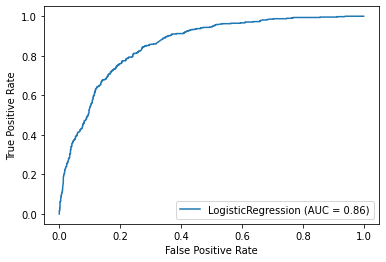

In [78]:
# Plot ROC curve
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()

In [80]:
model.coef_

array([[ 0.27783878,  0.10194126, -0.21183935,  0.26153941, -0.34842138,
         0.71696292, -0.37188521,  0.36542949,  0.00311205,  0.27847639,
         0.09006515, -0.10968094,  0.31447932,  0.05406222,  0.09183908,
         0.27670245, -0.01316342,  0.38170496,  0.81610508,  0.10093825,
        -0.920387  , -0.05242052, -0.08688399,  0.30377513, -0.16781428,
         1.36039863,  0.25646463, -0.30659021, -0.35135047, -0.77937912,
        -0.08077796, -0.28608186, -0.31453794, -0.12425592, -0.1598026 ,
        -0.10383154]])